# Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from numpy import expand_dims
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.densenet import DenseNet169
from keras.models import Model
from keras import layers
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam 
from keras import backend as K
from keras.callbacks import ModelCheckpoint

# Getting the Dataset from Stanford website

In [ ]:
!wget https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip # See README for MURA Dataset Research Use Agreement

--2023-03-03 16:24:37--  https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3380245855 (3.1G) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip       100%[===================>]   3.15G  14.6MB/s    in 4m 45s  

2023-03-03 16:29:23 (11.3 MB/s) - ‘MURA-v1.1.zip’ saved [3380245855/3380245855]



In [ ]:
# Unzip
!unzip -qq MURA-v1.1.zip

In [ ]:
!ls

MURA-v1.1  MURA-v1.1.zip  sample_data


About Dataset MURA is a large dataset of musculoskeletal radiographs contain an image of
- Elbow
- Finger
- Hand
- Humerus
- Forearm
- Shoulder
- Wrist

# Path of Train and Validation Datasets

In [ ]:
data_dir = 'MURA-v1.1'
train_dir = data_dir + '/train' # Path to train directory
val_dir = data_dir + '/valid' # Path to validation directory

# Display abnormal bone image

ABNORMAL


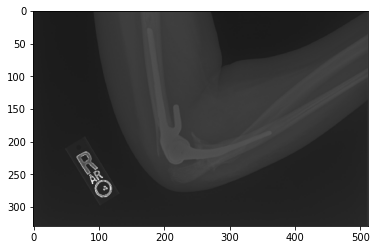

In [ ]:
img_abnormal = load_img('MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image2.png')
print('ABNORMAL')
plt.imshow(img_abnormal)
plt.show()

# Display normal bone image

NORMAL


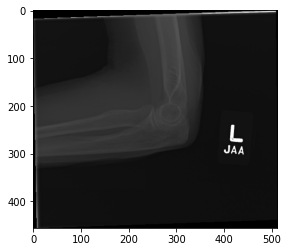

In [ ]:
img_normal = load_img('MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

# Train set studies with labels

In [ ]:
df=pd.read_csv('MURA-v1.1/train_labeled_studies.csv', names=['Train_Image','Train_Label'])

In [ ]:
df.head(20)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00006/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,0
8,MURA-v1.1/train/XR_SHOULDER/patient00008/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00009/study...,1


# Count labels in train set

0    8280
1    5177
Name: Train_Label, dtype: int64


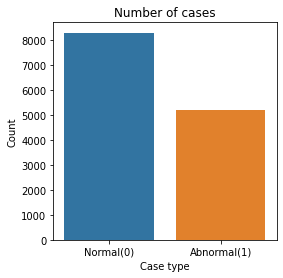

In [ ]:
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

# Adding labels to individual images in train set

In [ ]:
df=pd.read_csv('MURA-v1.1/train_image_paths.csv', names=['Train_Image'])
names=df['Train_Image'].values
train_labels=[]

for i in names:
  if ('positive' in i): # Abnormal(Positive) Images are labeled as 1
    train_labels.append('1')
  elif('negative' in i):
    train_labels.append('0') # Normal(Negative) Images are labeled as 0

train_labels = np.array(train_labels)

df.insert(1, 'Train_Label', train_labels)
df.to_csv('Train_set.csv', index=False)#storing in train_set.csv


In [ ]:
df.head(20)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
8,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1


# Count individual number of labels of images in train set

0    21935
1    14873
Name: Train_Label, dtype: int64


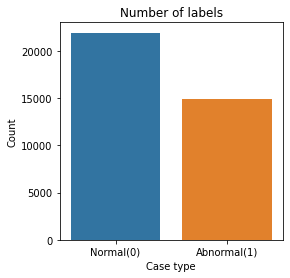

In [ ]:
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

#Validation set studies with labels

In [ ]:
df=pd.read_csv('MURA-v1.1/valid_labeled_studies.csv', names=['Valid_Image','Valid_Label'])

In [ ]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11188/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11189/study1_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11190/study1_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11191/study1_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11192/study1_p...,1


# Count labels in validation set

0    661
1    538
Name: Valid_Label, dtype: int64


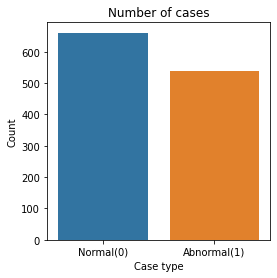

In [ ]:
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

# Adding labels to individual images in validation set

In [ ]:
df=pd.read_csv('MURA-v1.1/valid_image_paths.csv', names=['Valid_Image'])
names=df['Valid_Image'].values
valid_labels=[]

for i in names:
  if ('positive' in i):
    valid_labels.append('1') # Abnormal(Positive) Images are labelled as 1
  elif('negative' in i):
    valid_labels.append('0') # Normal(Negative) Images are labelled as 0

valid_labels = np.array(valid_labels)

df.insert(1, 'Valid_Label', valid_labels)
df.to_csv('Valid_set.csv', index=False)

In [ ]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1


# Count individual number of labels of images in validation set

0    1667
1    1530
Name: Valid_Label, dtype: int64


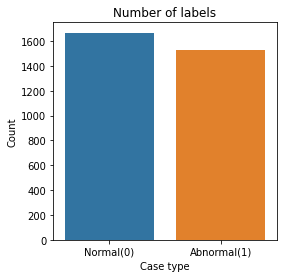

In [ ]:
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

# Read Training and Validation .csv files

In [ ]:
train_df = pd.read_csv("./Train_set.csv", dtype=str)
valid_df = pd.read_csv("./Valid_set.csv", dtype=str)

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             fill_mode='nearest')

# Visualizing how data is being Augmented

**We Augmented one image to six different image**
- Random Shift (Width shift range, height shift range)
- Random Flip (Horizontal Flip, Vertical Flip)
- Random Zoom (Any value smaller than 1 will zoom in else zoom out)

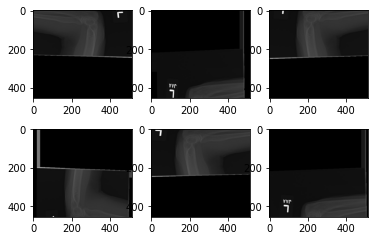

In [ ]:
# load the image
img =load_img('MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png') # this is a PIL image
# convert to numpy array 
data = tf.keras.utils.img_to_array(img, data_format=None, dtype=None)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen1 = ImageDataGenerator(width_shift_range=[-200,200],horizontal_flip=True, vertical_flip=True,zoom_range=0.2)
# prepare iterator
it = datagen1.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
	# define subplot
	plt.subplot(230 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

# Image Preprocessing

In [ ]:
train_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=None,
                                              x_col="Train_Image", y_col="Train_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=64, shuffle=True)

valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, directory=None,
                                              x_col="Valid_Image", y_col="Valid_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=64, shuffle=True)

Found 36808 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


**Future Improvement :**
 Using Computer vision
- Implementing Edge Detection 
- Highlighting Abnormal part of Bone in image

# Transfer Learning

In [ ]:
from keras import regularizers
densenet_model=Sequential()
base_model = tf.keras.applications.densenet.DenseNet169(include_top=False,
                                                     input_shape=(224, 224, 3),
                                                     weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False   #Freezing the weights of pre-trained model 

densenet_model.add(base_model)
#densenet_model.add(Flatten())
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(1664, activation="relu"))
densenet_model.add(Dropout(0.02))
densenet_model.add(Dense(832, activation="relu"))

densenet_model.add(Dense(1, activation="sigmoid"))
# place the head FC model on top of the base model (this will become the actual model we will train)

densenet_model.compile(optimizer = Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
densenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1664)              2770560   
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense_1 (Dense)             (None, 832)               1385280   
                                                                 
 dense_2 (Dense)             (None, 1)                 833       
                                                        

**Future Improvement**

- Tunning and Checking best value for Hyperparameter for our Model 

1. Epochs

- we can try out different  epochs size and also we can use Early Stopping in it

2. Batch Size

- we can try out different batch sizes

3. we can try our own base model and run on it

In [ ]:
train_steps=train_generator.n//train_generator.batch_size
valid_steps=valid_generator.n//valid_generator.batch_size

In [ ]:
filepath = "weights.hdf5" # Storing best validation accuracy 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')

In [ ]:
history = densenet_model.fit(train_generator,steps_per_epoch=train_steps,
                              validation_data=valid_generator,validation_steps=valid_steps,
                              epochs=10,
                              callbacks=[checkpoint])

Epoch 1/10
575/575 [==============================] - ETA: 0s - loss: 0.6007 - accuracy: 0.6874
Epoch 1: val_accuracy improved from -inf to 0.66645, saving model to weights.hdf5
575/575 [==============================] - 688s 1s/step - loss: 0.6007 - accuracy: 0.6874 - val_loss: 0.5996 - val_accuracy: 0.6665
Epoch 2/10
575/575 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.7185
Epoch 2: val_accuracy improved from 0.66645 to 0.71429, saving model to weights.hdf5
575/575 [==============================] - 680s 1s/step - loss: 0.5538 - accuracy: 0.7185 - val_loss: 0.5465 - val_accuracy: 0.7143
Epoch 3/10
575/575 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.7273
Epoch 3: val_accuracy did not improve from 0.71429
575/575 [==============================] - 650s 1s/step - loss: 0.5434 - accuracy: 0.7273 - val_loss: 0.5630 - val_accuracy: 0.7057
Epoch 4/10
575/575 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.7330
Ep

In [ ]:
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy
0,0.600674,0.687378,0.599591,0.666454
1,0.553799,0.718512,0.546489,0.714286
2,0.543370,0.727302,0.562957,0.705676
3,0.537377,0.733018,0.557613,0.708865
4,0.532426,0.735195,0.547195,0.713329
5,0.525616,0.740447,0.536165,0.729911
6,0.522115,0.741536,0.541348,0.722895
7,0.517917,0.747170,0.546333,0.721939
8,0.515137,0.748939,0.528057,0.733418
9,0.513497,0.747115,0.533113,0.732781


# Fine Tunning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  595


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
densenet_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
densenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1664)              2770560   
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense_1 (Dense)             (None, 832)               1385280   
                                                                 
 dense_2 (Dense)             (None, 1)                 833       
                                                        

In [ ]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = densenet_model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_generator)

Epoch 10/20
576/576 [==============================] - 794s 1s/step - loss: 0.5405 - accuracy: 0.7361 - val_loss: 0.5826 - val_accuracy: 0.7457
Epoch 11/20
576/576 [==============================] - 728s 1s/step - loss: 0.4970 - accuracy: 0.7702 - val_loss: 0.6363 - val_accuracy: 0.7075
Epoch 12/20
576/576 [==============================] - 692s 1s/step - loss: 0.4819 - accuracy: 0.7814 - val_loss: 0.4934 - val_accuracy: 0.7710
Epoch 13/20
576/576 [==============================] - 725s 1s/step - loss: 0.4714 - accuracy: 0.7866 - val_loss: 0.5103 - val_accuracy: 0.7682
Epoch 14/20
576/576 [==============================] - 685s 1s/step - loss: 0.4622 - accuracy: 0.7927 - val_loss: 0.5399 - val_accuracy: 0.7667
Epoch 15/20
576/576 [==============================] - 684s 1s/step - loss: 0.4570 - accuracy: 0.7955 - val_loss: 0.5365 - val_accuracy: 0.7285
Epoch 16/20
576/576 [==============================] - 716s 1s/step - loss: 0.4503 - accuracy: 0.8009 - val_loss: 0.4822 - val_accuracy:

# Helper Function

In [ ]:
# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,6),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams

In [ ]:
def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)

    ax = axes[0]

    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], ax = ax, colormap=CMAP)

    lossmin = hist_df[hist_df.columns[0]].min()

    validmin = hist_df[hist_df.columns[2]].min()

    # little beautification
    txtstr = "Min {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[0],
                                                                          lossmin,
                                                                          validmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")

    ax.set_ylabel(hist_df.columns[0].capitalize())

    ax.grid();

    ax = axes[1]

    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap=CMAP)

    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    validmin = hist_df[hist_df.columns[3]].max()
    txtstr = "Max {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[1],
                                                                                accmin,
                                                                                validmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(hist_df.columns[1].capitalize())
    ax.grid();
    plt.tight_layout()

# For transfer learning model

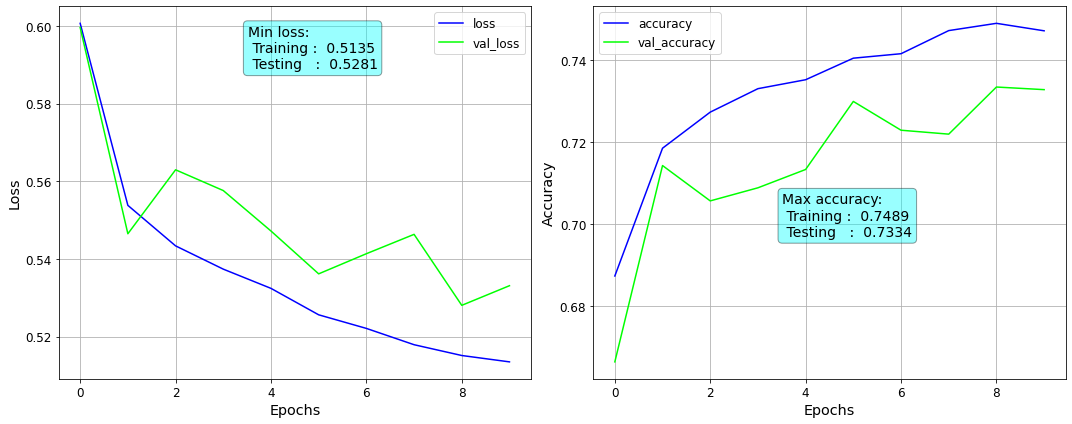

In [ ]:
fn_plot_hist(res_df)

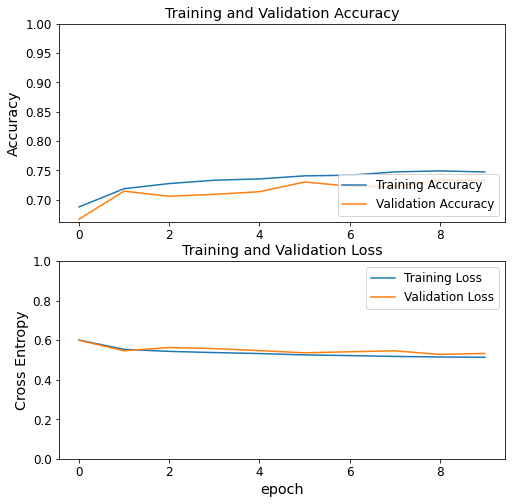

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# For fine Tuned model

In [ ]:
res_df1 = pd.DataFrame(history_fine.history)
res_df1

,loss,accuracy,val_loss,val_accuracy
0,0.540532,0.736090,0.582612,0.745699
1,0.496989,0.770159,0.636343,0.707538
2,0.481880,0.781433,0.493367,0.771035
3,0.471424,0.786650,0.510322,0.768220
4,0.462211,0.792681,0.539891,0.766656
5,0.457024,0.795534,0.536549,0.728495
6,0.450279,0.800940,0.482166,0.778542
7,0.445635,0.802434,0.469926,0.786049
8,0.441539,0.803548,0.460303,0.796997
9,0.434083,0.809905,0.480564,0.781045


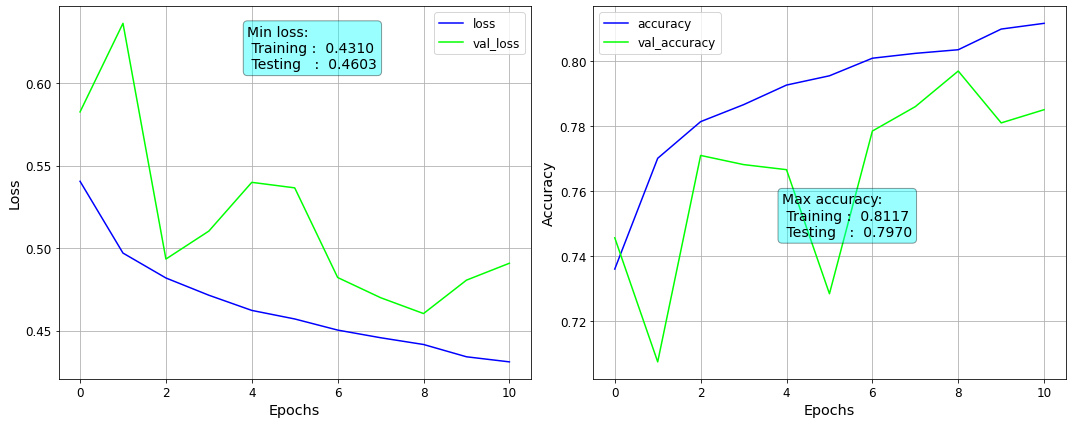

In [ ]:
fn_plot_hist(res_df1)

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

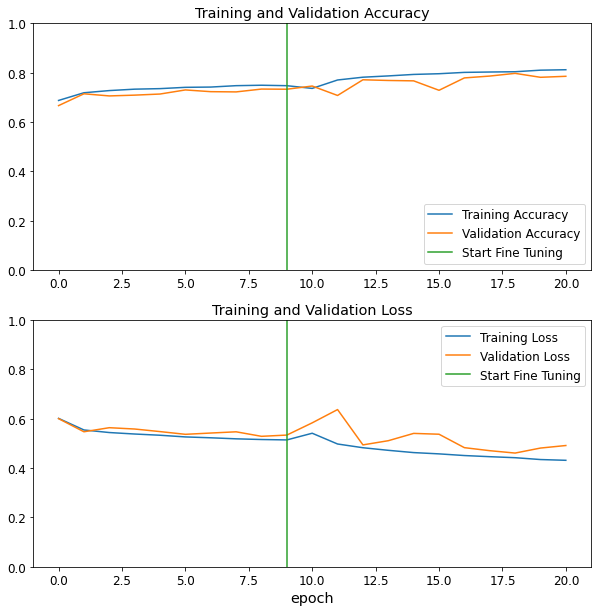

In [ ]:
initial_epochs=10
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**MODEL DEPLOYEMENT**

Because this is a research which is coming from stanford university and different department eg:- Department of Medicine, Department of Radiology. So to use this model as a SAAS(software as a service) we have to discuss on IP related issues and we have to get their clearance before we actually use it in production.

ALTERNATIVE OPTION: If university doesn't give us clearance, we will use it as a case study and we approach to different radiologist and we analyse them then we acquire the image from the radiologist and using their interpretation for the image we create our new dataset